<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [23]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [25]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [26]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


TASK 2 - Generate descriptive statistics and visualizations

Boxplot of median value of owner-occupied homes

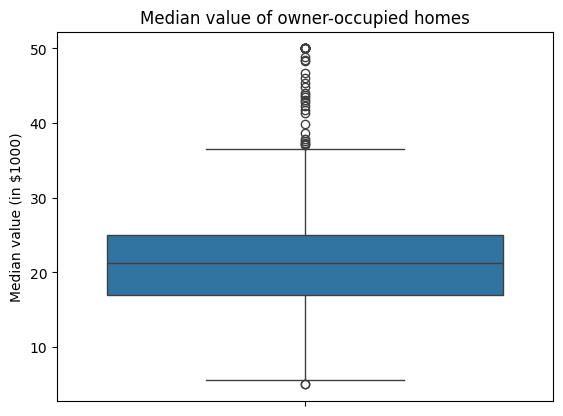

In [27]:
plot = sns.boxplot(y = "MEDV", data = boston_df)
pyplot.title("Median value of owner-occupied homes")
pyplot.xlabel("")
pyplot.ylabel("Median value (in $1000)")
pyplot.show()

Barplot of the Charles river variable

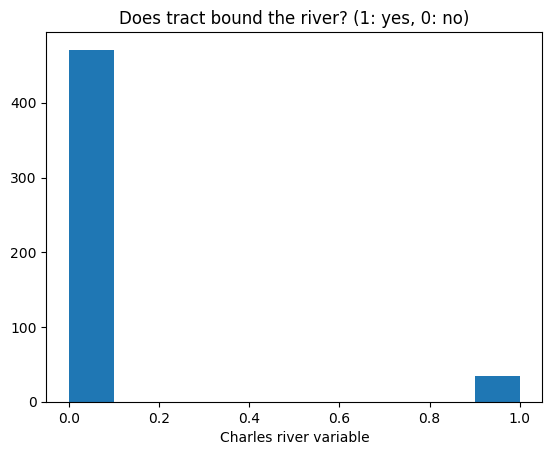

In [28]:
plot = pyplot.hist(boston_df['CHAS'])
pyplot.title("Does tract bound the river? (1: yes, 0: no)")
pyplot.xlabel("Charles river variable")
pyplot.ylabel("")
pyplot.show()

Boxplot of homes' median value (MEDV) against proportion of owner-occupied units built before 1940 (AGE). The AGE variable has been discretized into three categories: lower than 35, between 35 and 70, above 70

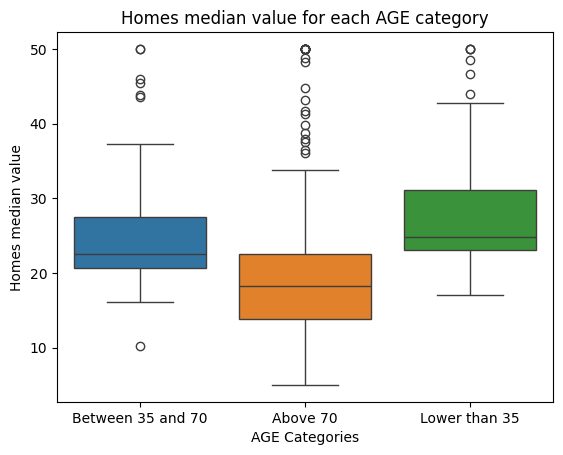

In [29]:
condlist = [boston_df['AGE'] <= 35, (boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), boston_df['AGE'] >= 70]
choicelist = ["Lower than 35", "Between 35 and 70", "Above 70"]
boston_df['AGE_CAT'] = np.select(condlist, choicelist, default = "No Data")

plot = sns.boxplot(y = "MEDV", x = "AGE_CAT", hue = "AGE_CAT", data = boston_df)
pyplot.title("Homes median value for each AGE category")
pyplot.xlabel("AGE Categories")
pyplot.ylabel("Homes median value")
pyplot.show()

Scatterplot showing the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)

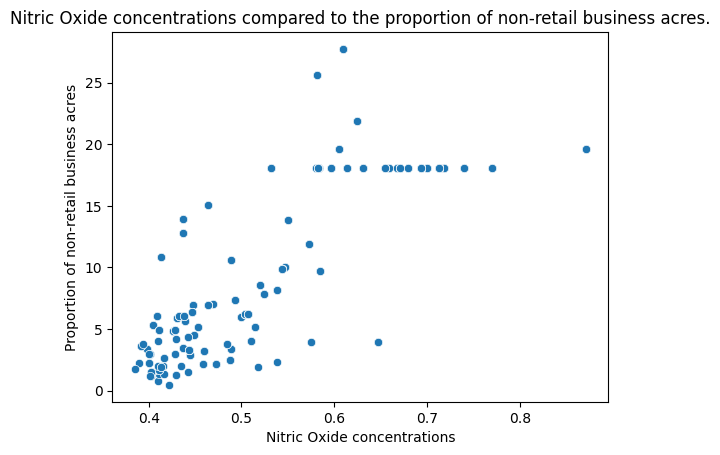

In [30]:
plot = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
pyplot.title("Nitric Oxide concentrations compared to the proportion of non-retail business acres.")
pyplot.xlabel("Nitric Oxide concentrations")
pyplot.ylabel("Proportion of non-retail business acres")
pyplot.show()

Histogram of the pupil to teacher ratio

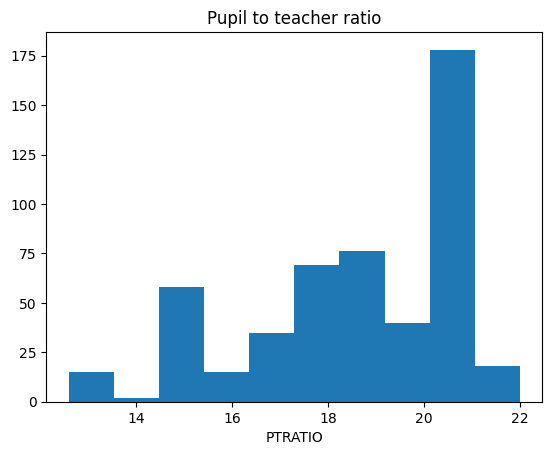

In [31]:
plot = pyplot.hist(boston_df['PTRATIO'])
pyplot.title("Pupil to teacher ratio")
pyplot.xlabel("PTRATIO")
pyplot.ylabel("")
pyplot.show()

TASK 3 - Statistical tests

QUESTION 1 - Is there a significant difference in median values of housed bounded by the Charles river or not? We can answer this question with a t-test for independent samples. The null hypothesis is that there is no significant difference between the median values of houses bounded by the Charles river and of the houses that are not.

In [32]:
tTest = scipy.stats.ttest_ind(
	boston_df[boston_df['CHAS'] == 0]['MEDV'],
	boston_df[boston_df['CHAS'] == 1]['MEDV']
)
print(tTest)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


Given the resulting p-value = 7.391e-05, which is lower than the significance level 0.05, we reject the null hypothesis that the median values of the two sub-populations aren't significantly different at the given confidence level of 95% (as well at 99%).

QUESTION 2 - Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? We rely upon the 'AGE' variable categories ('AGE_CAT') previously constructed and conduct an ANOVA test, where the null hypothesis is that there is no significan difference in median values betwee the three houses' sub-populations

In [34]:
anovaTest = scipy.stats.f_oneway(boston_df[boston_df['AGE_CAT'] == "Lower than 35"]['MEDV'],boston_df[boston_df['AGE_CAT'] == "Between 35 and 70"]['MEDV'],boston_df[boston_df['AGE_CAT'] == "Above 70"]['MEDV'])
print(anovaTest)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


The p-value associated to this statistical test is 1.711e-15. We therefore reject the null hypothesis that the median values of the three houses' sub-populations are not significantly different at the given confidence level of 95% (as well at 99%).

QUESTION 3 - Can we conclude that there is no relationship between Nitric Oxide concentrations ('NOX') and the proportion of non-retail business acres per town ('INDUS')? We can answer this question conducting a Pearson correlation test between the two continuous variables.

In [35]:
pearsonCorr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(pearsonCorr)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


The correlation between the two variables is 76.37%, and the associated p-value is 7.913e-98. We therefore reject the null hypothesis that this correlation is not statistically significant at the given confidence level of 95%.

QUESTION 4 - What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? We can assess this relying on a linear regression analysis.

In [36]:
X = boston_df['DIS']
X = sm.add_constant(X)

y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        20:31:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In this analysis, we observe a coefficient of 1.0916 associated to the variable 'DIS'. The related p-value is lower than 0.05, which rejects the hypothesis that this coefficient is not statistically significant. We cal interpret this result as an additiona $1091.6 in houses' median values with each unit increase in the weighted distance to the five Boston employments centres.